# **Uber Ride Exploratory Data Analysis 2024**

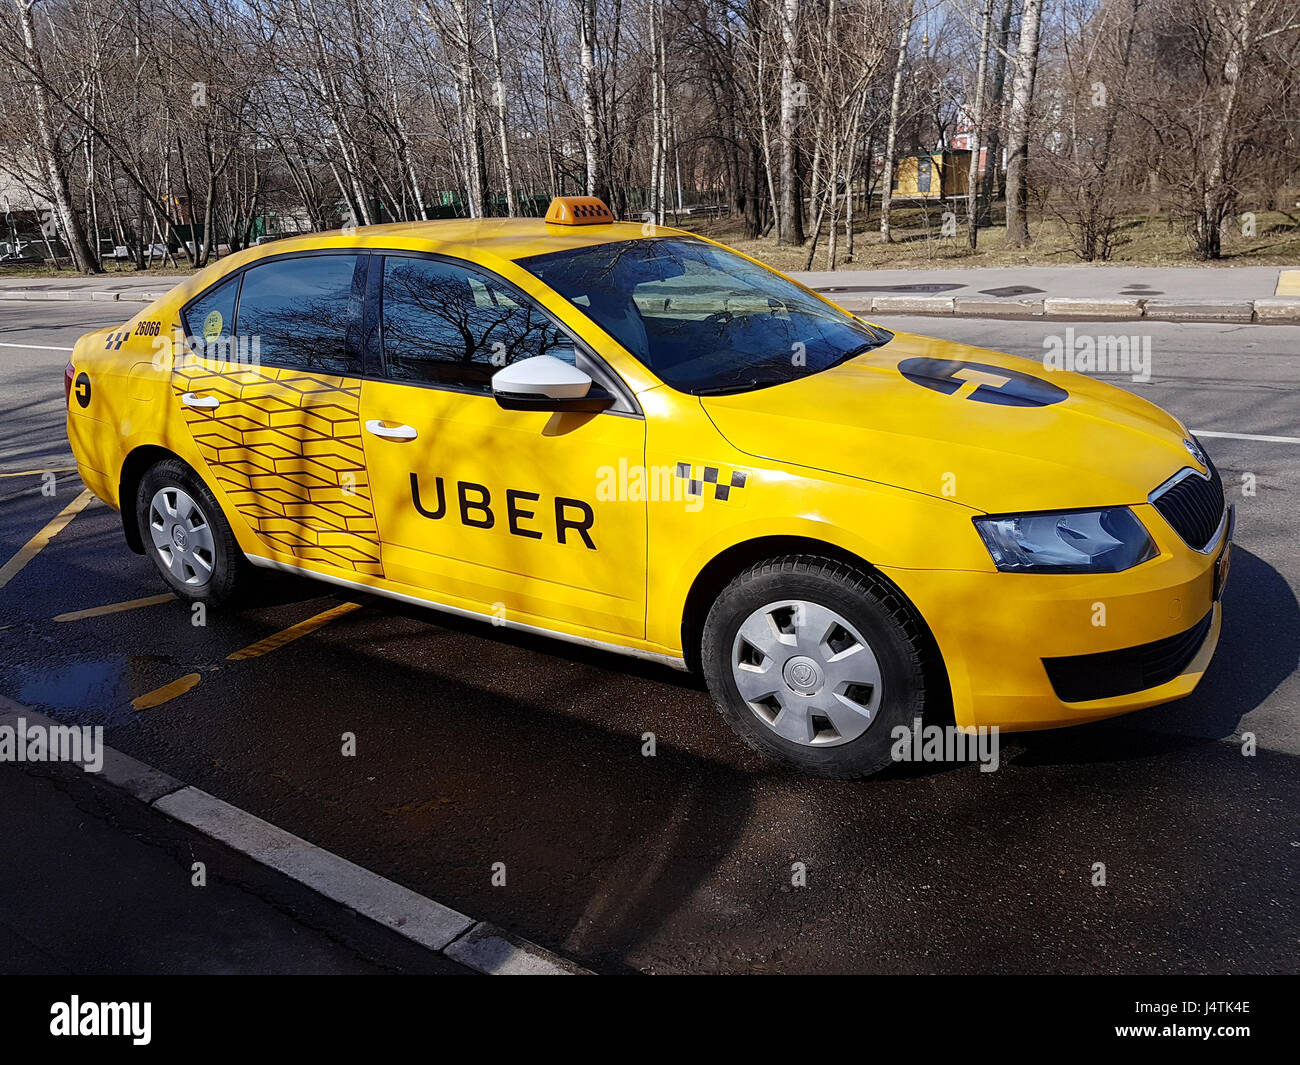

**Uber Ride Analytics Dataset 2024**

This comprehensive dataset contains detailed ride-sharing data from Uber operations for the year 2024, providing rich insights into booking patterns, vehicle performance, revenue streams, cancellation behaviors, and customer satisfaction metrics.

**Dataset Overview**

The dataset captures 148,770 total bookings across multiple vehicle types and provides a complete view of ride-sharing operations including successful rides, cancellations, customer behaviors, and financial metrics.


***Import Libraries***

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Import Dataset***

In [56]:
df = pd.read_csv("/content/ncr_ride_bookings.csv")

In [57]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


**Initial Exploration**

In [58]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [59]:
print(df.describe(include='all').T)

                                      count  unique                     top  \
Date                                 150000     365              2024-11-16   
Time                                 150000   62910                17:44:57   
Booking ID                           150000  148767            "CNR6337479"   
Booking Status                       150000       5               Completed   
Customer ID                          150000  148788            "CID6715450"   
Vehicle Type                         150000       7                    Auto   
Pickup Location                      150000     176                 Khandsa   
Drop Location                        150000     176                  Ashram   
Avg VTAT                           139500.0     NaN                     NaN   
Avg CTAT                           102000.0     NaN                     NaN   
Cancelled Rides by Customer         10500.0     NaN                     NaN   
Reason for cancelling by Customer     10500       5 

In [60]:
print(df.isnull().sum())

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64


**Handling null values**

***Avg VTAT and Avg CTAT***

In [61]:
#These are timing metrics — missing values often mean the ride was never started or canceled before pickup.

#Keep them as NaN for cancelled rides (don’t impute, since 0 would imply vehicle arrived instantly, which is false).

#fill with median for completed rides only
df.loc[df['Booking Status'] == 'Completed', 'Avg VTAT'] = df.loc[df['Booking Status'] == 'Completed', 'Avg VTAT'].fillna(df['Avg VTAT'].median())
df.loc[df['Booking Status'] != 'Completed', 'Avg VTAT'] = np.nan

***Cancellation-related columns***

In [62]:
#Cancelled Rides by Customer, Reason for cancelling by Customer

#Cancelled Rides by Driver, Driver Cancellation Reason

#Missing here means ride was not cancelled by that party — replace with 0 for flags and "Not Cancelled" for reasons.
df['Cancelled Rides by Customer'] = df['Cancelled Rides by Customer'].fillna(0)
df['Reason for cancelling by Customer'] = df['Reason for cancelling by Customer'].fillna("Not Cancelled")
df['Cancelled Rides by Driver'] = df['Cancelled Rides by Driver'].fillna(0)
df['Driver Cancellation Reason'] = df['Driver Cancellation Reason'].fillna("Not Cancelled")

***Incomplete Rides and Incomplete Rides Reason***

In [63]:
#Missing here usually means ride was completed or cancelled, not incomplete.
#Fill with 0 for flag and "Not Incomplete" for reason.
df['Incomplete Rides'] = df['Incomplete Rides'].fillna(0)
df['Incomplete Rides Reason'] = df['Incomplete Rides Reason'].fillna("Not Incomplete")

***Booking Value, Ride Distance, Payment Method***

In [64]:
#Missing means the ride never happened — e.g., cancelled before start.

#keep NaN for cancelled rides (so averages are not skewed).For completed rides, fill missing fares and distances with median (if small % missing).
df.loc[df['Booking Status'] == 'Completed', 'Booking Value'] = df.loc[df['Booking Status'] == 'Completed', 'Booking Value'].fillna(df['Booking Value'].median())
df.loc[df['Booking Status'] != 'Completed', 'Booking Value'] = np.nan
df.loc[df['Booking Status'] == 'Completed', 'Ride Distance'] = df.loc[df['Booking Status'] == 'Completed', 'Ride Distance'].fillna(df['Ride Distance'].median())
df['Payment Method'] = df['Payment Method'].fillna("Unknown")

***Driver Ratings and Customer Rating***

In [65]:
#Missing likely means the trip never happened or feedback wasn’t given.
#Keep as NaN if trip didn’t complete; for completed rides without rating,Fill with average rating
df.loc[df['Booking Status'] == 'Completed', 'Driver Ratings'] = df.loc[df['Booking Status'] == 'Completed', 'Driver Ratings'].fillna(df['Driver Ratings'].mean())
df.loc[df['Booking Status'] == 'Completed', 'Customer Rating'] = df.loc[df['Booking Status'] == 'Completed', 'Customer Rating'].fillna(df['Customer Rating'].mean())

***Other fields with 1 missing value***

(Booking Status, Customer ID, Vehicle Type, Pickup Location, Drop Location)

In [66]:
#Drop those rows — 1 row won’t affect the dataset much.

df.dropna(subset=['Booking Status', 'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location'], inplace=True)

In [67]:
# Categorical summaries
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())


Value counts for Date:
 Date
2024-11-16    462
2024-05-09    456
2024-09-18    456
2024-10-12    452
2024-01-26    452
             ... 
2024-12-26    369
2024-10-11    365
2024-11-18    358
2024-05-02    357
2024-08-22    355
Name: count, Length: 365, dtype: int64

Value counts for Time:
 Time
17:44:57    16
19:17:33    12
17:54:33    11
11:29:50    11
10:23:23    11
            ..
14:31:44     1
01:50:30     1
16:17:05     1
04:15:42     1
20:26:18     1
Name: count, Length: 62910, dtype: int64

Value counts for Booking ID:
 Booking ID
"CNR6337479"    3
"CNR7199036"    3
"CNR3648267"    3
"CNR2726142"    3
"CNR5292943"    3
               ..
"CNR7686931"    1
"CNR8314394"    1
"CNR1224369"    1
"CNR7115617"    1
"CNR1632634"    1
Name: count, Length: 148767, dtype: int64

Value counts for Booking Status:
 Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: coun

In [68]:
print("\nNull values after handling:")
print(df[categorical_cols].isnull().sum())


Null values after handling:
Date                                 0
Time                                 0
Booking ID                           0
Booking Status                       0
Customer ID                          0
Vehicle Type                         0
Pickup Location                      0
Drop Location                        0
Reason for cancelling by Customer    0
Driver Cancellation Reason           0
Incomplete Rides Reason              0
Payment Method                       0
dtype: int64


In [69]:
# Convert date & time columns
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

## **Visual EDA**

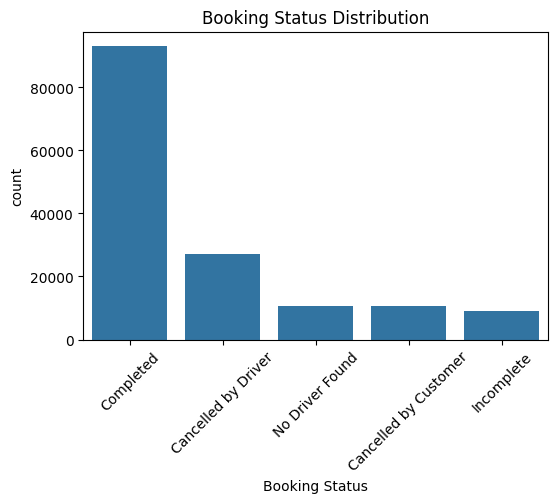

In [70]:
# Booking Status distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Booking Status', order=df['Booking Status'].value_counts().index)
plt.title('Booking Status Distribution')
plt.xticks(rotation=45)
plt.show()

**Booking Status Distribution**

**Observation:** Majority of rides are completed (~93k).

Second most frequent outcome is Cancelled by Driver (~ 27k).
followed by No Driver Found and Cancelled by Customer (~10.5k each).

Incomplete rides (~9k) are the smallest category.

**Insight:**  Driver cancellations are nearly 2.5x higher than customer cancellations, which could indicate operational issues like driver availability or ride acceptance.


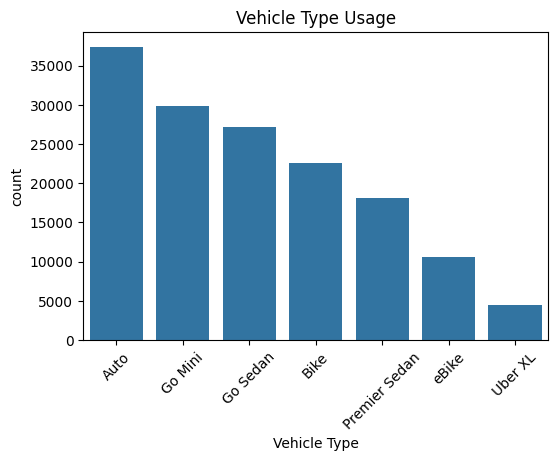

In [71]:
# Vehicle Type distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Vehicle Type', order=df['Vehicle Type'].value_counts().index)
plt.title('Vehicle Type Usage')
plt.xticks(rotation=45)
plt.show()

**Vehicle Type Usage**

**Observation:**

Top three: Auto (~ 37k), Go Mini (~ 29.8k), Go Sedan (~27.1k).

Uber XL has the lowest share (~4.4k).

**Insight:** Economy and compact options dominate demand. Premium segments are niche but still contribute to revenue.

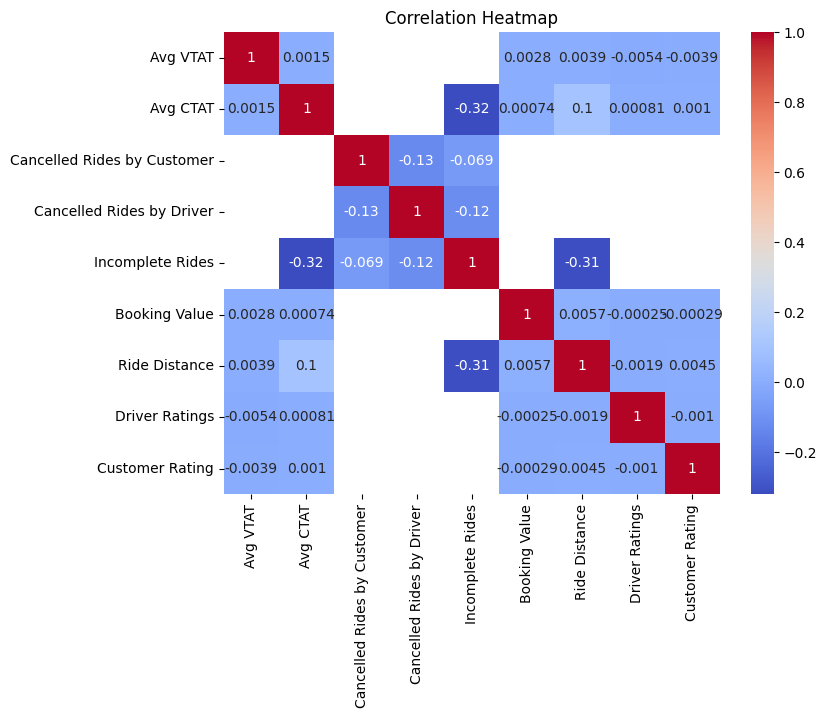

In [72]:
# Correlation Heatmap (numerical)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Correlation Heatmap**

**Observation:** Very low correlations among Booking Value, Ride Distance, and ratings.

**Insight**: Pricing isn’t strongly tied to distance alone—likely due to factors like surge pricing, vehicle type, or city zones.

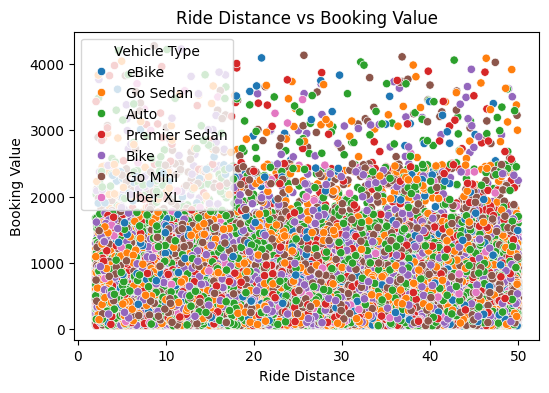

In [73]:
#  Ride Distance vs Booking Value
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Ride Distance', y='Booking Value', hue='Vehicle Type')
plt.title('Ride Distance vs Booking Value')
plt.show()

**Ride Distance vs Booking Value (Scatterplot)**

**Observation:**

**General upward trend:** longer rides tend to cost more.

Large spread for rides of similar distance  **→** possible surge pricing or variable demand.

Outliers with high fares at low distances suggest minimum fare policies or peak pricing.

**Insight:** Fare structure is not purely linear with distance.

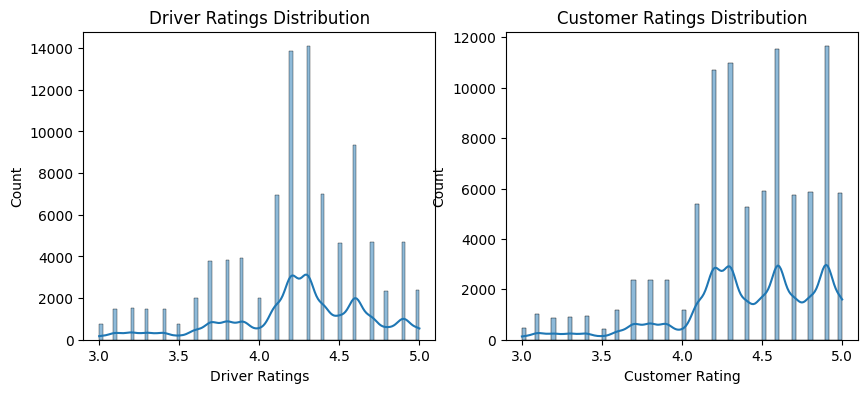

In [74]:
#  Ratings distribution
fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(df['Driver Ratings'], kde=True, ax=ax[0])
ax[0].set_title("Driver Ratings Distribution")
sns.histplot(df['Customer Rating'], kde=True, ax=ax[1])
ax[1].set_title("Customer Ratings Distribution")
plt.show()

**Ratings Distribution**

**Driver Ratings:** Mostly 4.0–4.6 range, skewed towards positive.

**Customer Ratings:** Slightly higher average than driver ratings.

**Insight:** Overall satisfaction levels are high, but driver ratings are marginally lower, hinting at possible customer expectations not being met.

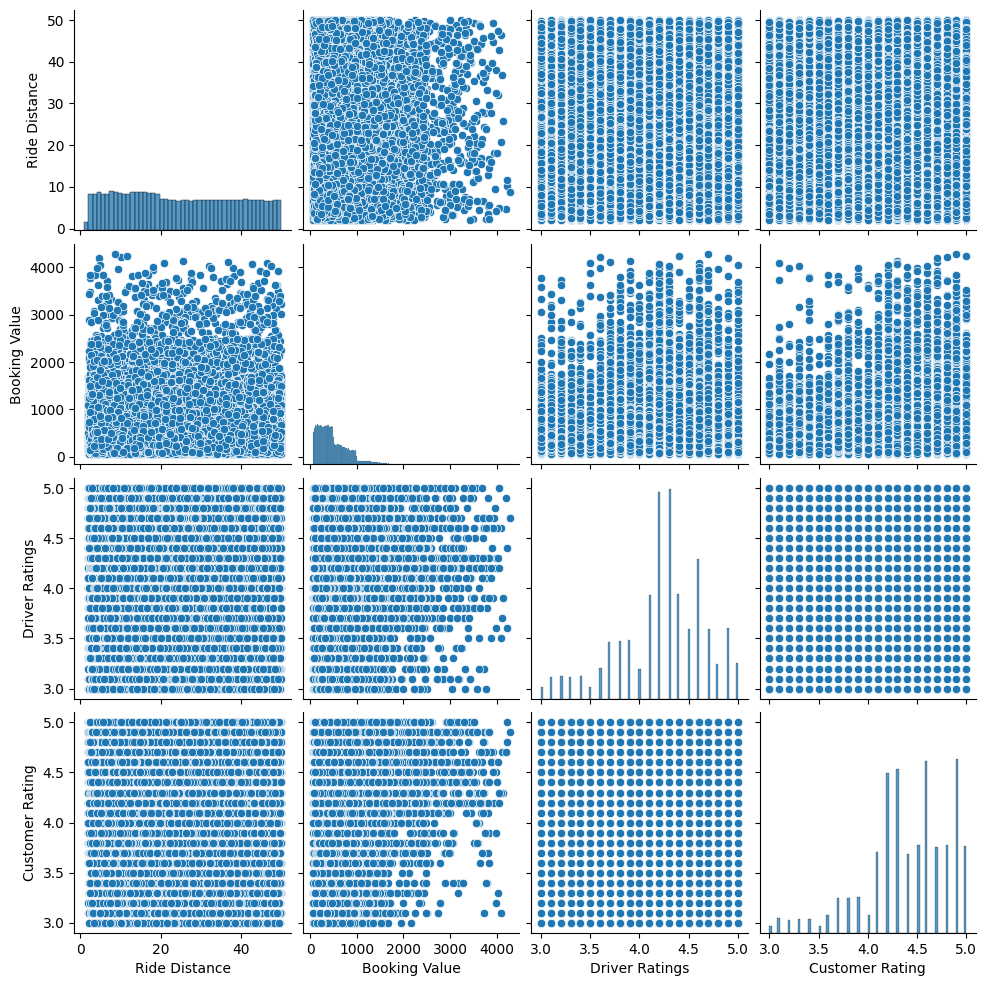

In [75]:
#  Pairplot for key metrics
sns.pairplot(df[['Ride Distance', 'Booking Value', 'Driver Ratings', 'Customer Rating']])
plt.show()

**Pairplot (Key Metrics)**

**Observation:**

Booking value has weak visible relation with ratings.

Distance and booking value show moderate visual association (but not strong statistically).

**Insight:** Customer/driver satisfaction is not significantly influenced by fare or distance.

## **Statistical Insights**

In [76]:
# Average booking value by vehicle type
avg_value_by_vehicle = df.groupby('Vehicle Type')['Booking Value'].mean().sort_values(ascending=False)
print("\nAverage Booking Value by Vehicle Type:\n", avg_value_by_vehicle)


Average Booking Value by Vehicle Type:
 Vehicle Type
Go Sedan         512.026865
Premier Sedan    509.567632
Bike             509.114508
Go Mini          507.381422
Auto             506.483049
Uber XL          505.302192
eBike            503.458556
Name: Booking Value, dtype: float64


**Average Booking Value by Vehicle Type**

**Observation:**

**Highest:** Go Sedan (₹512) and Premier Sedan (₹509).

**Lowest:** eBike (~₹503).

Spread is narrow (~₹503–₹512).

**Insight**: Average fares are quite similar across vehicle types, suggesting short ride lengths dominate even for premium categories.

In [77]:
# Cancellation rates
cancel_rate_cust = df['Cancelled Rides by Customer'].mean() * 100
cancel_rate_driver = df['Cancelled Rides by Driver'].mean() * 100
print(f"\nCustomer Cancellation Rate: {cancel_rate_cust:.2f}%")
print(f"Driver Cancellation Rate: {cancel_rate_driver:.2f}%")


Customer Cancellation Rate: 7.00%
Driver Cancellation Rate: 18.00%


**Cancellation Rates**

**Observation:**

Customer cancellation rate: **~7%.**

Driver cancellation rate:**~18%.**

**Insight:** Driver-side cancellations are a key operational challenge.

In [78]:
# Ratings relationship
rating_corr = df[['Driver Ratings', 'Customer Rating', 'Booking Value', 'Ride Distance']].corr()
print("\nRating correlations:\n", rating_corr)


Rating correlations:
                  Driver Ratings  Customer Rating  Booking Value  Ride Distance
Driver Ratings         1.000000        -0.001010      -0.000249      -0.001875
Customer Rating       -0.001010         1.000000      -0.000287       0.004514
Booking Value         -0.000249        -0.000287       1.000000       0.005668
Ride Distance         -0.001875         0.004514       0.005668       1.000000


**Ratings Correlation Table**

**Observation:** All correlations are near zero.

**Insight:** Ratings are independent of fare, distance, and each other.



## **Summary of Findings**

**1.Operational Performance**

* Most rides are completed successfully.

* Driver cancellations are notably higher than customer cancellations.

* “No Driver Found” cases suggest a supply-demand gap.


**2.Demand Patterns**

* Economy options (Auto, Go Mini, Go Sedan) dominate the booking share.

* Premium and large-capacity vehicles have low usage.

**3.Revenue Insights**

* Average booking value is relatively consistent across vehicle types.

* Distance is a factor, but pricing is influenced by surge/minimum fare rules.

**4.Customer Experience**

* Ratings are high overall.

* No significant relationship between ratings, fare, and distance—suggesting satisfaction is driven by other factors (driver behavior, timeliness, ride comfort).

**5.Areas of Improvement**

* Reduce driver cancellations through better matching and incentives.

* Address “No Driver Found” by balancing driver supply in high-demand zones.

* Investigate operational bottlenecks in premium ride categories.